# Тема 1. Интерполяция в полиномиальных базисах

In [2]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

## Часть 1. Интерполяция полиномами

### Пример 1

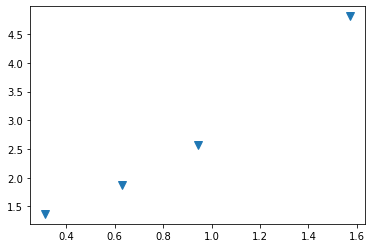

In [21]:
x_a = np.array([0.1, 0.2, 0.3, 0.5]) * np.pi
y_a = np.exp(x_a)
plt.plot(x_a, y_a, 'v', markersize=8)

x_b = np.array([0.1, 1 / 6, 0.3, 0.4]) * np.pi
y_b = np.cos(x_b)

m = 5
a = 0.
b = 1.0
d =(b-a)/m

x = np.arange(a, b+d, d) * np.pi
y = np.sin(x)

#plt.plot(x, y)
#plt.plot(x_a, y_a, 'v', markersize=10)    
#plt.plot(x_b, y_b, '*', markersize=8)
#plt.plot(x_f, y_f, 'v', markersize=8)

        3         2
0.4042 x + 0.183 x + 1.157 x + 0.9751


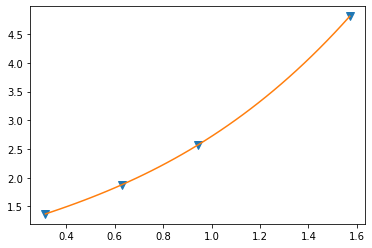

In [22]:
poly_a = interp.lagrange(x_a, y_a)
x_d = np.arange (0.1, 0.51, 0.01)* np.pi
print (poly_a)
plt.plot(x_a, y_a, 'v', markersize=8)
plt.plot(x_d, poly_a(x_d))

### Пример 2

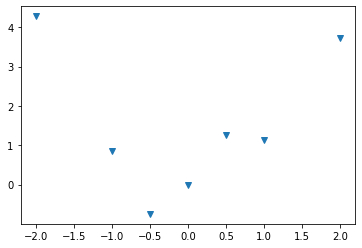

In [30]:
x_c = np.array([-2.0,-1.0, -0.5, 0.0, 0.5, 1.0, 2.0]) #*2
y_c = x_c**2 + np.sin(3 * x_c)
plt.plot(x_c, y_c, 'v')

           6          5             4         3     2
2.637e-16 x + 0.6342 x - 1.055e-15 x - 3.265 x + 1 x + 2.771 x


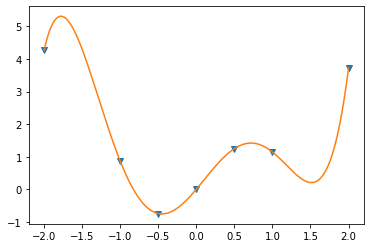

In [32]:
poly_c = interp.lagrange(x_c, y_c)

print (poly_c)

x_d = np.arange (-2, 2.01, 0.01)

plt.plot(x_c, y_c, 'v')
plt.plot(x_d, poly_c(x_d))


          16             15             14             13
4.28e-16 x  - 7.172e-06 x  - 5.014e-14 x  + 0.0002382 x 
              12            11             10           9            8
 - 5.562e-13 x  - 0.004394 x  - 4.997e-13 x  + 0.05418 x + 1.13e-12 x
           7             6         5             4       3     2
 - 0.4339 x + 9.878e-13 x + 2.025 x + 6.096e-14 x - 4.5 x + 1 x + 3 x


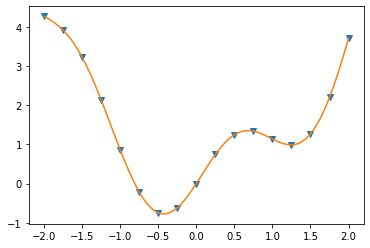

In [82]:
x_f = np.arange(-2.0, 2.25, 0.25)
y_f = x_f**2 + np.sin(3 * x_f)
poly_f = interp.lagrange(x_f, y_f)
print (poly_f)
x_plot = x_d
plt.plot(x_f, y_f, 'v')
plt.plot(x_plot, poly_f(x_plot))

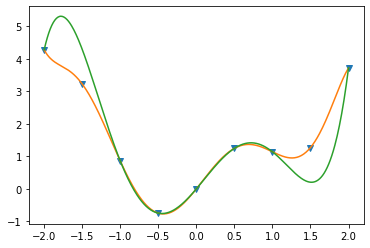

In [39]:
plt.plot(x_f, y_f, 'v')
plt.plot(x_d, poly_f(x_d))
plt.plot(x_d, poly_c(x_d))

## Часть 2. Сплайн - интерполяция

### Пример 3

[-2.  -0.5  0.   0.5  2. ]
[-3  7 -3  7 -3]


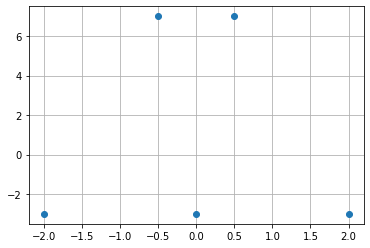

In [75]:
x = np.array([-2, -0.5, 0, 0.5, 2])
y = np.array([-3, 7, -3, 7, -3])
print (x)
print (y)

plt.grid()
plt.plot(x, y, 'o')

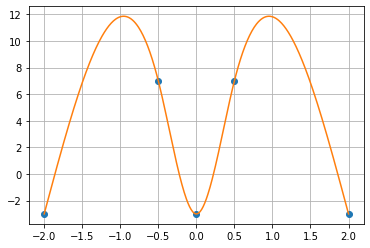

In [76]:
cubic = interp.CubicSpline(x, y, bc_type='natural')

x_d = np.arange (-2, 2.01, 0.01)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x_d, cubic(x_d))

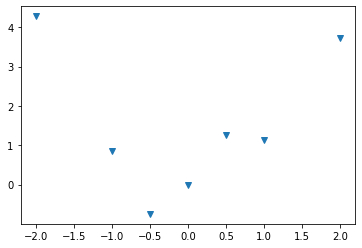

In [59]:
plt.plot(x_c, y_c, 'v')

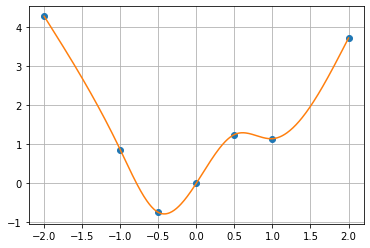

In [61]:
cubic = interp.CubicSpline(x_c, y_c, bc_type='natural')
x_plot = x_d
plt.grid()
plt.plot(x_c, y_c, 'o')

plt.plot(x_plot, cubic(x_plot));

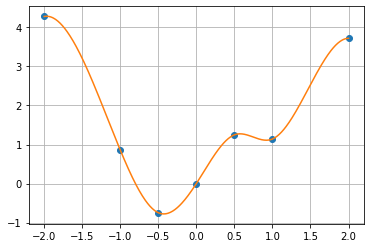

In [66]:
cubic = interp.CubicSpline(x_c, y_c, bc_type=((1, 0.4), (1, 0)))
plt.grid()
x_plot = x_d
plt.plot(x_c, y_c, 'o')
plt.plot(x_plot, cubic(x_plot))